In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Refs.

1. Introduction to the theory of neuronal computation, Hertz, Krogh, Palmer (1991)

2. https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

3. https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1

## Teoría

### Una neurona de salida

Consideramos un perceptrón simple (una capa) de $n$ entradas y de una salida.
Si el vector $x\in\mathbb{R}^n$ representa el estado de las neuronas de entrada, el estado de la neurona de salida viene determinado por

$$ g(b+wx) \;\;\; (1)$$

donde la constante $b\in \mathbb{R}$ se llama umbral, y el vector $w\in \mathbb{R}^n$ representa los pesos sinápticos.
Aquí

$$ wx = \Sigma_{i=1}^n w_ix_i $$ 

es un producto escalar y $g\in (\mathbb{R} \to \mathbb{R})$ es alguna función activación.
Básicamente, las funciones activación son funciones no decrecientes que poseen alguna no linealidad.
Existen muchas funciones de activación, pero nos enfocaremos en usar

\begin{eqnarray}
g(x)
&=& \tanh(\beta x) \\
&=& \frac{e^{\beta x}-e^{-\beta x}}{e^{\beta x}+e^{-\beta x}} \\
\end{eqnarray}

la cual graficamos a continuación para diferentes valores de $\beta$

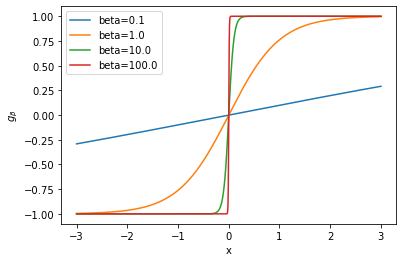

In [2]:
beta = 1.0
def g(x):
    return np.tanh(beta*x)

x = np.linspace(-3,3,1000)
for _beta in [0.1,1.0,10.0,100.0]:
    beta = _beta
    plt.plot(x,np.vectorize(g)(x),label='beta='+str(beta))
    
plt.xlabel("x")
plt.ylabel("$g_{\\beta}$")
plt.legend()

Esta $g$ es diferenciable en $\mathbb{R}$ y satisface

$$ g' = \beta(1-g^2) $$

lo cual, convenientemente, puede ser usado para ahorrar recursos de cómputo.
A continuación graficamos ésta derivada

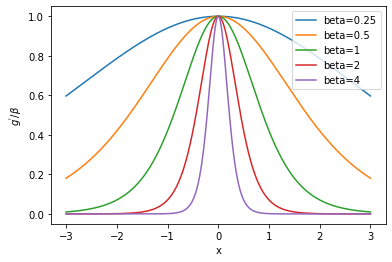

In [3]:
def dg(x):
    return beta*(1.0-g(x)**2)

x = np.linspace(-3,3,1000)
for _beta in [2**i for i in range(-2,3)]:
    beta = _beta
    plt.plot(x,np.vectorize(lambda x:dg(x)/beta)(x),label='beta='+str(beta))
    
plt.xlabel("x")
plt.ylabel("$g^{'}/\\beta$")
plt.legend()

en donde vemos que se transforma en un pico cuyo máximo crece como $\sim \beta$ en torno a $x=0$.

Un **truco** útil consiste en notar que 

$$ b + wx = b + \sum_{i=0}^n w_ix_i $$ 

puede remplazarse por 

$$ wx = w_0x_0 + \sum_{i=1}^n w_ix_i = \sum_{i=0}^n w_ix_i $$ 

si introducimos el peso sináptico $w_0=b$ y una $0$-ésima neurona artificial de estado permanente $x_0=1$.

#### Entrenamiento

Consideremos una serie de datos de entrada $x_1,...,x_q$ donde $x_k\in \mathbb{R}^{1+n}$ para todo $k=1,...,q$, y una serie de datos de salida $y_1,...,y_q$ donde $y_k\in \mathbb{R}$ para todo $k=1,...,q$.
Estos datos podrían ser generados por experimentos o sintéticamente, recordando que hay que fijar $x_{k0}=1$ para todo $k$ para poder aprovechar el **truquito**.

El objetivo es entrenar los pesos sinápticos de la red hasta que ésta logre aproximar, de la mejor manera posible, la relación entre los datos de entrada y los de salida.
Formalmente, buscamos minimizar la suma de errores cuadráticos

\begin{eqnarray}
e&:=&\sum_{k=1}^q (y_k-g(wx_k))^2 \\
\end{eqnarray}

con respecto a $w$.
Si pensamos a $e$ como una función $e\in (\mathbb{R}^{(1+n)}\ni w\to \mathbb{R})$, podemos intentar minimizarla descendiendo por el gradiente de componentes

\begin{eqnarray}
\frac{\partial e}{\partial w_i}
&=& 2\sum_{k=1}^q (y_k-g(wx_k))\frac{\partial}{\partial w_i}(y_k-g(wx_k)) \\
&=& -2\sum_{k=1}^q (y_k-g(wx_k))g'(wx_k)\frac{\partial}{\partial w_i}wx_k \\
&=& 2\sum_{k=1}^q (g(wx_k)-y_k)g'(wx_k) x_{ki} \\
&=& 2\sum_{k=1}^q (v_k-y_k)u_k x_{ki} \\
\end{eqnarray}

donde $x_{ki}$ es la $i$-ésima componente de la $k$-ésima muestra de entrada $x_k$.
Además, por cuestiones prácticas, en la última línea hemos introducido los vectores
$v_k := g(wx_k)$
y
$u_k := g'(wx_k)$.


Un sencillo algoritmo de minimización por el gradiente consiste en inicializar $w$ con valores elegidos al azar de alguna distribución centrada en 0, para luego ir actualizandolos iterativamente según las regla

$$ w_i \leftarrow w_i - r \frac{\partial e}{\partial w_i}$$

donde $r>0$ es algún valor pequeño que determina la tasa de convergencia.
La regla debe aplicarse para todo $i$ en cada iteración, hasta que veamos que el error $e$ deja de crecer.

#### Minipráctico

**a)** Usar `scikit-learn.datasets.make_classification` para crear un dataset para clasificación con:

- 2 características (features)
- 2 clases
- 200 muestras
- sin redundancia
- 1 grupo (cluster) por clase

In [4]:
from sklearn.datasets import make_classification

In [5]:
n = 2
muestras = 200

x_ki,y_k = make_classification(
    n_features=n,
    n_classes=2,
    n_samples=muestras,
    n_redundant=0,
    n_clusters_per_class=1
)

In [6]:
x_ki.shape,y_k.shape

((200, 2), (200,))

In [7]:
x_ki

array([[-3.06333739e+00, -3.16300295e+00],
       [ 6.84081332e-01, -3.78862851e-01],
       [-2.09842214e+00, -2.09464788e+00],
       [-2.45288979e+00, -2.49065635e+00],
       [-1.63488053e+00, -1.76430568e+00],
       [-1.51714945e+00, -1.29794906e+00],
       [-1.60970265e+00, -1.76327556e+00],
       [ 1.90162690e+00, -1.46146410e+00],
       [ 1.49064131e+00, -1.51297521e+00],
       [-7.03299647e-01, -7.90361561e-01],
       [ 3.47186662e+00, -2.70140956e+00],
       [-2.47022778e+00, -2.62366760e+00],
       [ 5.58606547e-01,  6.82081345e-01],
       [ 1.59065276e+00, -9.84027079e-01],
       [ 2.60461283e+00, -2.20522094e+00],
       [-2.04171897e+00,  2.97967092e-01],
       [-7.69319814e-01,  6.33310553e-01],
       [ 2.29022109e+00, -2.08494456e+00],
       [ 1.38539977e-01,  7.83152853e-02],
       [-6.63482462e-01, -8.95756321e-01],
       [ 2.17856059e-01, -5.63706446e-01],
       [ 1.79293432e+00, -1.20146227e+00],
       [ 6.80665854e-01, -2.10513913e-01],
       [-6.

In [ ]:
y_k

**b)** Grafique el dataset generado.

In [ ]:
color = {0:'red',1:'blue'}
for k in range(muestras):
    plt.scatter([x_ki[k,0]],[x_ki[k,1]],c=color[y_k[k]])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

**c)** Implemente un perceptron simple de $2$ neuronas de entrada y una de salida, utilizando

$$ g(x) = \tanh(\beta x) $$ 

como función activación.

In [ ]:
# Agregamos la columna truquito
tmp = np.ones((muestras,n+1))
tmp[:,1:n+1] = x_ki
x_ki = tmp
#x_ki

In [ ]:
def perceptron(w_i,x_i):
    return g(np.dot(w_i,x_i))

**d)** Implemente una funcion que entrene el perceptron. Utilice

- $\beta=1$
- $r=0.01$
- y $t_{max}=100$ iteraciones

El entrenador debe tomar como entrada, entre otras cosas,

- el dataset de entrenamiento, i.e. los vectores $x$,$y$, de componentes $x_{ki}$ e $y_k$ correspondiendo a la muestra $k$-ésima y la neurona de entrada $i$-ésima.
- el vector de pesos sinápticos $w$

y debe retornar un vector de componentes $e_t =$ que indiquen el error cuadrático tras $t$ iteraciones.
Durante el proceso de entrenamiento, el entrenador debe modificar el vector $w$ que es pasado como argumento.

Grafique $e_t$ vs $t$.

In [ ]:
def entrenar(w_i,x_ki,y_k,r,tmax,g):
    for t in range(tmax):
        v_k = np.vectorize(g)(np.dot(x_ki,w_i))
        u_k = beta*(1-v_k**2)
        e_k = (v_k-y_k)
        e = np.dot(e_k,e_k)
        w_i -= r*np.dot(x_ki.T,2*(v_k-y_k)*u_k) # Notar como usamos producto punto sobre indice k en a_k := (v_k-y_k)*u_k y luego producto escalar entre x_ki y a_k sobre indice k
        yield t,e

In [ ]:
# Inicializamos pesos sinápticos
w_i = np.random.normal(size=(n+1))
w_i

In [ ]:
beta=1.0
r=0.01
t_max=100

tvec,evec=[],[]
for t,e in entrenar(w_i,x_ki,y_k,r,t_max,g):
    tvec.append(t)
    evec.append(e)
plt.plot(tvec,evec)
plt.xlabel("t")
plt.ylabel("e")

**e)** Grafique el resultado del entrenamiento

In [ ]:
# Ploteamos el resultado del entrenamiento
for k in range(muestras):
    if perceptron(w_i,x_ki[k,:])>0:
        c='blue'
    else:
        c='red'
    plt.scatter([x_ki[k,1]],[x_ki[k,2]],c=c)

# Agregamos linea de separacion
xmin = np.min(x_ki[:,1])
xmax = np.max(x_ki[:,1])
xs = np.linspace(xmin,xmax,100)
def yy(xx):
    w0 = w_i[0]
    w1 = w_i[1]
    w2 = w_i[2]
    return -w0/w2 - w1/w2*xx
plt.plot(xs,np.vectorize(yy)(xs))

**f)** Repita todo lo anterior probando con otras funciones de activación, valores de $r$ y de $\beta$.